In [159]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba.metric import AIC_score
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
bike_df = pd.read_csv(r"C:\Users\patri\Documents\Making_Data_Decisions_Files\dmba-datasets\day.csv")

In [160]:
#check out how the data is layed out
bike_df.head()
#We will be using multiple linear regression because it is good for predicting a continuous outcome,
#e.g. how many bikes will be rented on a given day, given the conditions

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [161]:
#create dummy variables for weathersit
weather_dummies = pd.get_dummies(bike_df['weathersit'], prefix='weather')
bike_df = pd.concat([bike_df.drop(columns=['weathersit']), weather_dummies], axis=1)
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,weather_1,weather_2,weather_3
0,1,2011-01-01,1,0,1,0,6,0,0.344167,0.363625,0.805833,0.160446,331,654,985,False,True,False
1,2,2011-01-02,1,0,1,0,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801,False,True,False
2,3,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,True,False,False
3,4,2011-01-04,1,0,1,0,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,True,False,False
4,5,2011-01-05,1,0,1,0,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,True,False,False


In [162]:
#We choose predictors and set the outcome to cnt
predictors = ['season', 'holiday', 'workingday', 'weather_1', 'weather_2', 'weather_3', 'atemp', 'windspeed']
outcome = 'cnt'
X = pd.get_dummies(bike_df[predictors], drop_first=True)
y = bike_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=0.4, random_state=1)
bike_lm = LinearRegression()

In [163]:
bike_lm.fit(train_X, train_y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [164]:
#These coefficients are insane, I dont understand why they're so high considering all of the input variables are very small
print(pd.DataFrame({'Predictor': X.columns, 'coefficient':bike_lm.coef_}))

    Predictor  coefficient
0      season   419.325828
1     holiday  -480.251788
2  workingday   125.656518
3   weather_1  1192.331603
4   weather_2   537.947044
5   weather_3 -1730.278647
6       atemp  5511.919950
7   windspeed -1451.696374


In [165]:
#Regression Seems really high for people renting bikes
regressionSummary(train_y, bike_lm.predict(train_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1383.5118
            Mean Absolute Error (MAE) : 1177.1775
          Mean Percentage Error (MPE) : -14.4551
Mean Absolute Percentage Error (MAPE) : 34.8918


In [166]:
#Use our linear model on the validation to score it
bike_lm_pred = bike_lm.predict(valid_X)
result = pd.DataFrame({'Predicted': bike_df_pred, 'Actual': valid_y, 'Residual': valid_y-bike_df_pred})
print(result.head(20))

       Predicted  Actual     Residual
404  3138.013002    3830   691.986998
726  1742.407945    2114   371.592055
159  5437.338764    3915 -1522.338764
422  3541.259905    4322   780.740095
512  5482.760478    6591  1108.239522
241  5898.948439    5204  -694.948439
698  4666.896676    5323   656.103324
247  4371.183007    3351 -1020.183007
355  3380.320685    3068  -312.320685
528  4437.387084    4972   534.612916
120  3674.503241    3351  -323.503241
69   2382.643326    1977  -405.643326
8    1913.042219     822 -1091.042219
364  3815.620436    2485 -1330.620436
524  5431.900478    7736  2304.099522
368  1436.326109    2368   931.673891
180  6028.227869    5515  -513.227869
495  4600.071354    6572  1971.928646
259  4093.237842    4511   417.762158
506  4225.887025    4359   133.112975


In [167]:
#The RMSE is actually fairly reasonable, which is baffling
regressionSummary(valid_y, bike_lm_pred)


Regression statistics

                      Mean Error (ME) : 1.4525
       Root Mean Squared Error (RMSE) : 1293.0458
            Mean Absolute Error (MAE) : 1102.7866
          Mean Percentage Error (MPE) : -46.1299
Mean Absolute Percentage Error (MAPE) : 64.8586


In [168]:
#We use exhaustive search to determine if our chosen predictors are decent
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[list(variables)], train_y)
    return model
def score_model(model,variables):
    pred_y = model.predict(train_X[list(variables)])
    return -adjusted_r2_score(train_y, pred_y, model)
allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)
data = []
for result in results:
     model = result['model']
     variables = list(result['variables'])
     AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
     d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
     d.update({var: var in result['variables'] for var in allVariables})
     data.append(d)
pd.DataFrame(data, columns =('n', 'r2adj', 'AIC') + tuple(sorted(allVariables)))
#Hey this looks pretty good

,n,r2adj,AIC,atemp,holiday,season,weather_1,weather_2,weather_3,windspeed,workingday
0,1,0.333198,7685.636528,True,False,False,False,False,False,False,False
1,2,0.383805,7652.059585,True,False,False,False,False,True,False,False
2,3,0.438349,7612.456077,True,False,True,False,False,True,False,False
3,4,0.460539,7595.789540,True,False,True,True,True,False,False,False
4,5,0.462438,7595.232773,True,False,True,True,False,True,True,False
5,6,0.463549,7595.311154,True,True,True,True,True,False,True,False
6,7,0.463229,7596.555306,True,True,True,False,True,True,True,True
7,8,0.461978,7598.555306,True,True,True,True,True,True,True,True


In [193]:
bike_lm_pred = bike_lm.predict(valid_X)
all_residuals = valid_y - bike_lm_pred
approx = [-3000, 3000]
#big gap

In [194]:
print(len(all_residuals[(all_residuals>-3000) & (all_residuals <3000)]) / len(all_residuals))
#most of the stuff is within +/-3000

0.9863481228668942


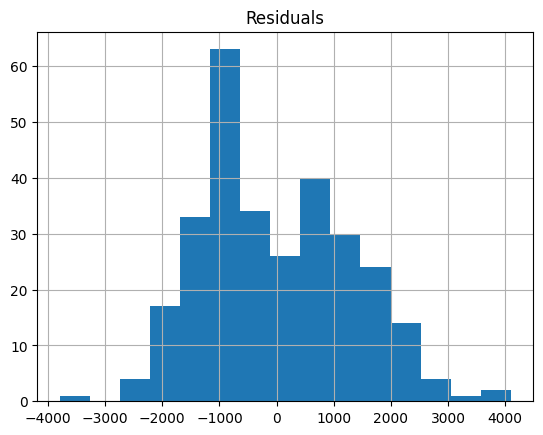

In [195]:
pd.DataFrame({'Residuals': all_residuals}).hist(bins=15)
plt.show()
#It's a bell curve if you squint your eyes really hard

In [196]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[list(variables)], train_y)
    return model
def score_model(model,variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)
allVariables = train_X.columns
best_model, best_variables = backward_elimination(allVariables, train_model, score_model, verbose=True)
print(best_variables)

Variables: season, holiday, workingday, weather_1, weather_2, weather_3, atemp, windspeed
Start: score=7598.56
Step: score=7596.56, remove weather_1
Step: score=7595.31, remove workingday
Step: score=7595.23, remove holiday
Step: score=7595.23, remove None
['season', 'weather_2', 'weather_3', 'atemp', 'windspeed']


In [197]:
#Shrinking
from sklearn.preprocessing import StandardScaler
#Check shape of train_X and valid_X
print('train_X shape:', train_X.shape)
print('valid_X shape:', valid_X.shape)

train_X shape: (438, 8)
valid_X shape: (293, 8)


In [198]:
#Regularized linear regression
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
valid_X_scaled = scaler.fit_transform(valid_X)
lasso = Lasso(alpha = 1)
lasso.fit(train_X_scaled,train_y)
regressionSummary(valid_y, lasso.predict(valid_X_scaled))
ridge = Ridge(alpha=1)
ridge.fit(train_X_scaled,train_y)
regressionSummary(valid_y, ridge.predict(valid_X_scaled))
#Bayesian ridge
bayesianRidge = BayesianRidge()
bayesianRidge.fit(train_X_scaled,train_y)
regressionSummary(valid_y, bayesianRidge.predict(valid_X_scaled))


Regression statistics

                      Mean Error (ME) : -227.2404
       Root Mean Squared Error (RMSE) : 1330.9442
            Mean Absolute Error (MAE) : 1145.4518
          Mean Percentage Error (MPE) : -52.3986
Mean Absolute Percentage Error (MAPE) : 67.3122

Regression statistics

                      Mean Error (ME) : -227.2404
       Root Mean Squared Error (RMSE) : 1331.4334
            Mean Absolute Error (MAE) : 1145.7514
          Mean Percentage Error (MPE) : -51.9359
Mean Absolute Percentage Error (MAPE) : 66.8663

Regression statistics

                      Mean Error (ME) : -227.2404
       Root Mean Squared Error (RMSE) : 1334.8278
            Mean Absolute Error (MAE) : 1149.0041
          Mean Percentage Error (MPE) : -52.9872
Mean Absolute Percentage Error (MAPE) : 67.8747


In [202]:
#Test the rest of the dataset
train_df = train_X.join(train_y)
predictors = train_X.columns
formula = 'cnt ~ ' + ' + '.join(predictors)
bike_lm = sm.ols(formula=formula, data=train_df).fit()
bike_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     54.88
Date:                Fri, 03 Oct 2025   Prob (F-statistic):           8.04e-56
Time:                        22:47:38   Log-Likelihood:                -3789.3
No. Observations:                 438   AIC:                             7595.
Df Residuals:                     430   BIC:                             7627.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           119.5514    277.772      0.430      0.667    -426.408     665.510
weather_1[T.True]  1232.1821    144.732      8.514      0.000     947.712    1516.652
weather_2[T.True]   577.7975    149.581      3.863      0.000     283.797     871.798
weather_3[T.True] -1690.4282    302.713     -5.584      0.000   -2285.409   -1095.447
season              419.3258     67.051      6.254      0.000     287.536     551.115
holiday            -480.2518    421.418     -1.140      0.255   -1308.547     348.043
workingday          125.6565    145.809      0.862      0.389    -160.930     412.243
atemp              5511.9200    459.922     11.984      0.000    4607.945    6415.895
windspeed         -1451.6964    903.689     -1.606      0.109   -3227.894     324.501
==============================================================================
Omnibus:                       22.831   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.616
Skew:                           0.150   Prob(JB):                      0.00495
Kurtosis:                       2.299   Cond. No.                     2.83e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.28e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [200]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
#Create the model
ridge_model = Ridge(alpha=1.0) 
#define k-fold cross-validator, we arbitrarily choose 5
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
#Do the validation, the KFold function shuffles the data and create k splits
ridge_scores = cross_val_score(ridge_model, X, y, cv=kf, scoring='neg_mean_squared_error')
#convert the scores to positive values and take teh square root to get the RMSE
ridge_rmse_scores = np.sqrt(-ridge_scores)
#print results
print(f'Ridge RMSE scores for each fold: {ridge_rmse_scores}')
print(f'Average Ridge RMSE: {ridge_rmse_scores.mean()}')
print(f'Standard Deviation of the Ridge RMSE: {ridge_rmse_scores.std()}')
#the idea behind this is that it is taking my data and splitting it into new groups in order to test the various errors for each group or 'fold'


Ridge RMSE scores for each fold: [1362.16203559 1418.36825701 1285.01439541 1343.15256084 1403.62677209]
Average Ridge RMSE: 1362.464804187174
Standard Deviation of the Ridge RMSE: 47.30988030395421


In [201]:
import numpy as np
#Create the model
#do with with Lasso
lasso_model = Lasso(alpha=1.0) 
#define k-fold cross-validator, we arbitrarily choose 5
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
#Do the validation, the KFold function shuffles the data and create k splits
lasso_scores = cross_val_score(lasso_model, X, y, cv=kf, scoring='neg_mean_squared_error')
#convert the scores to positive values and take teh square root to get the RMSE
lasso_rmse_scores = np.sqrt(-lasso_scores)
#print results
print(f'Lasso RMSE scores for each fold: {lasso_rmse_scores}')
print(f'Average Lasso RMSE: {lasso_rmse_scores.mean()}')
print(f'Standard Deviation of the Lasso RMSE: {lasso_rmse_scores.std()}')
#the idea behind this is that it is taking my data and splitting it into new groups in order to test the various errors for each group or 'fold'


Lasso RMSE scores for each fold: [1354.99723784 1427.82697548 1278.90903972 1341.51157911 1405.89750606]
Average Lasso RMSE: 1361.8284676428607
Standard Deviation of the Lasso RMSE: 52.216771962871015
